In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import sklearn
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

/Users/fengp/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/fengp/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
citibike = mglearn.datasets.load_citibike()

In [3]:
type(citibike)


pandas.core.series.Series

In [4]:
citibike.head

<bound method NDFrame.head of starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64>

In [5]:
citibike.index

DatetimeIndex(['2015-08-01 00:00:00', '2015-08-01 03:00:00',
               '2015-08-01 06:00:00', '2015-08-01 09:00:00',
               '2015-08-01 12:00:00', '2015-08-01 15:00:00',
               '2015-08-01 18:00:00', '2015-08-01 21:00:00',
               '2015-08-02 00:00:00', '2015-08-02 03:00:00',
               ...
               '2015-08-30 18:00:00', '2015-08-30 21:00:00',
               '2015-08-31 00:00:00', '2015-08-31 03:00:00',
               '2015-08-31 06:00:00', '2015-08-31 09:00:00',
               '2015-08-31 12:00:00', '2015-08-31 15:00:00',
               '2015-08-31 18:00:00', '2015-08-31 21:00:00'],
              dtype='datetime64[ns]', name='starttime', length=248, freq='3H')

<IPython.core.display.Javascript object>


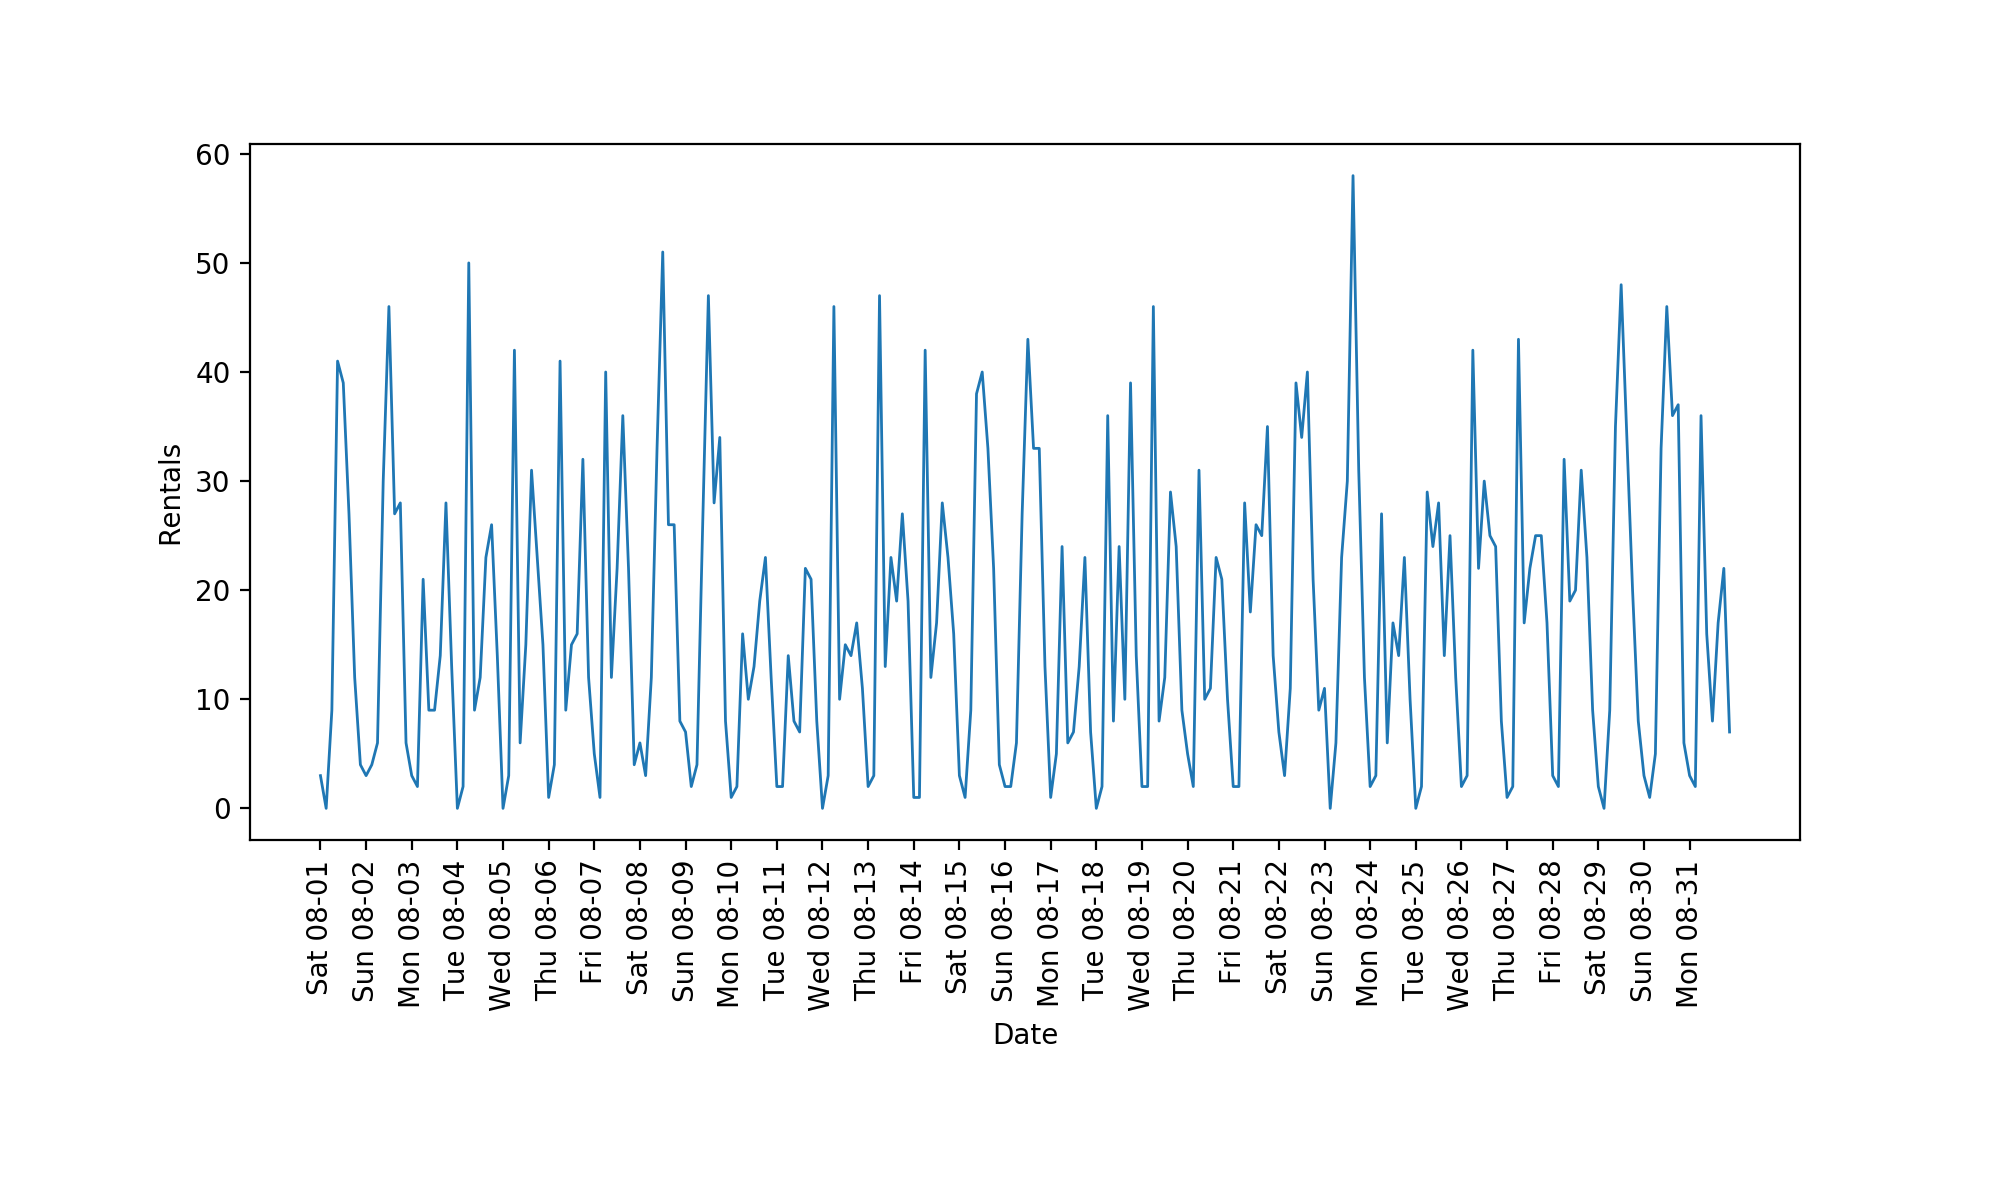

/Users/fengp/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq="D")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime("%a %m-%d"), rotation=90)
ax.plot(citibike, linewidth=1)
ax.set_xlabel("Date")
ax.set_ylabel("Rentals")
fig.subplots_adjust(bottom=0.3)


In [7]:
y = citibike.values
X = citibike.index.strftime("%s").astype("int").values.reshape(-1, 1)

In [8]:
X.shape

(248, 1)

In [9]:
n_train = 184
def eval_on_features(features, target, regressor):
    fig, ax = plt.subplots(figsize=(11, 8))
    X_train, X_test, y_train, y_test = features[:n_train], features[n_train:], y[:n_train],y[n_train:]
    print(f"X_train shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    ax.set_xticks(range(0, len(features), 8))
    ax.set_xticklabels(xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    ax.plot(np.arange(n_train), y_train, label="train")
    ax.plot(range(n_train, n_train+len(X_test)), y_test, label="test")
    ax.plot(np.arange(n_train), y_pred_train, "--", label="prediction train")
    ax.plot(range(n_train, n_train+len(X_test)), y_pred, "--", label="prediction test")
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Rentals")
    
    

<IPython.core.display.Javascript object>


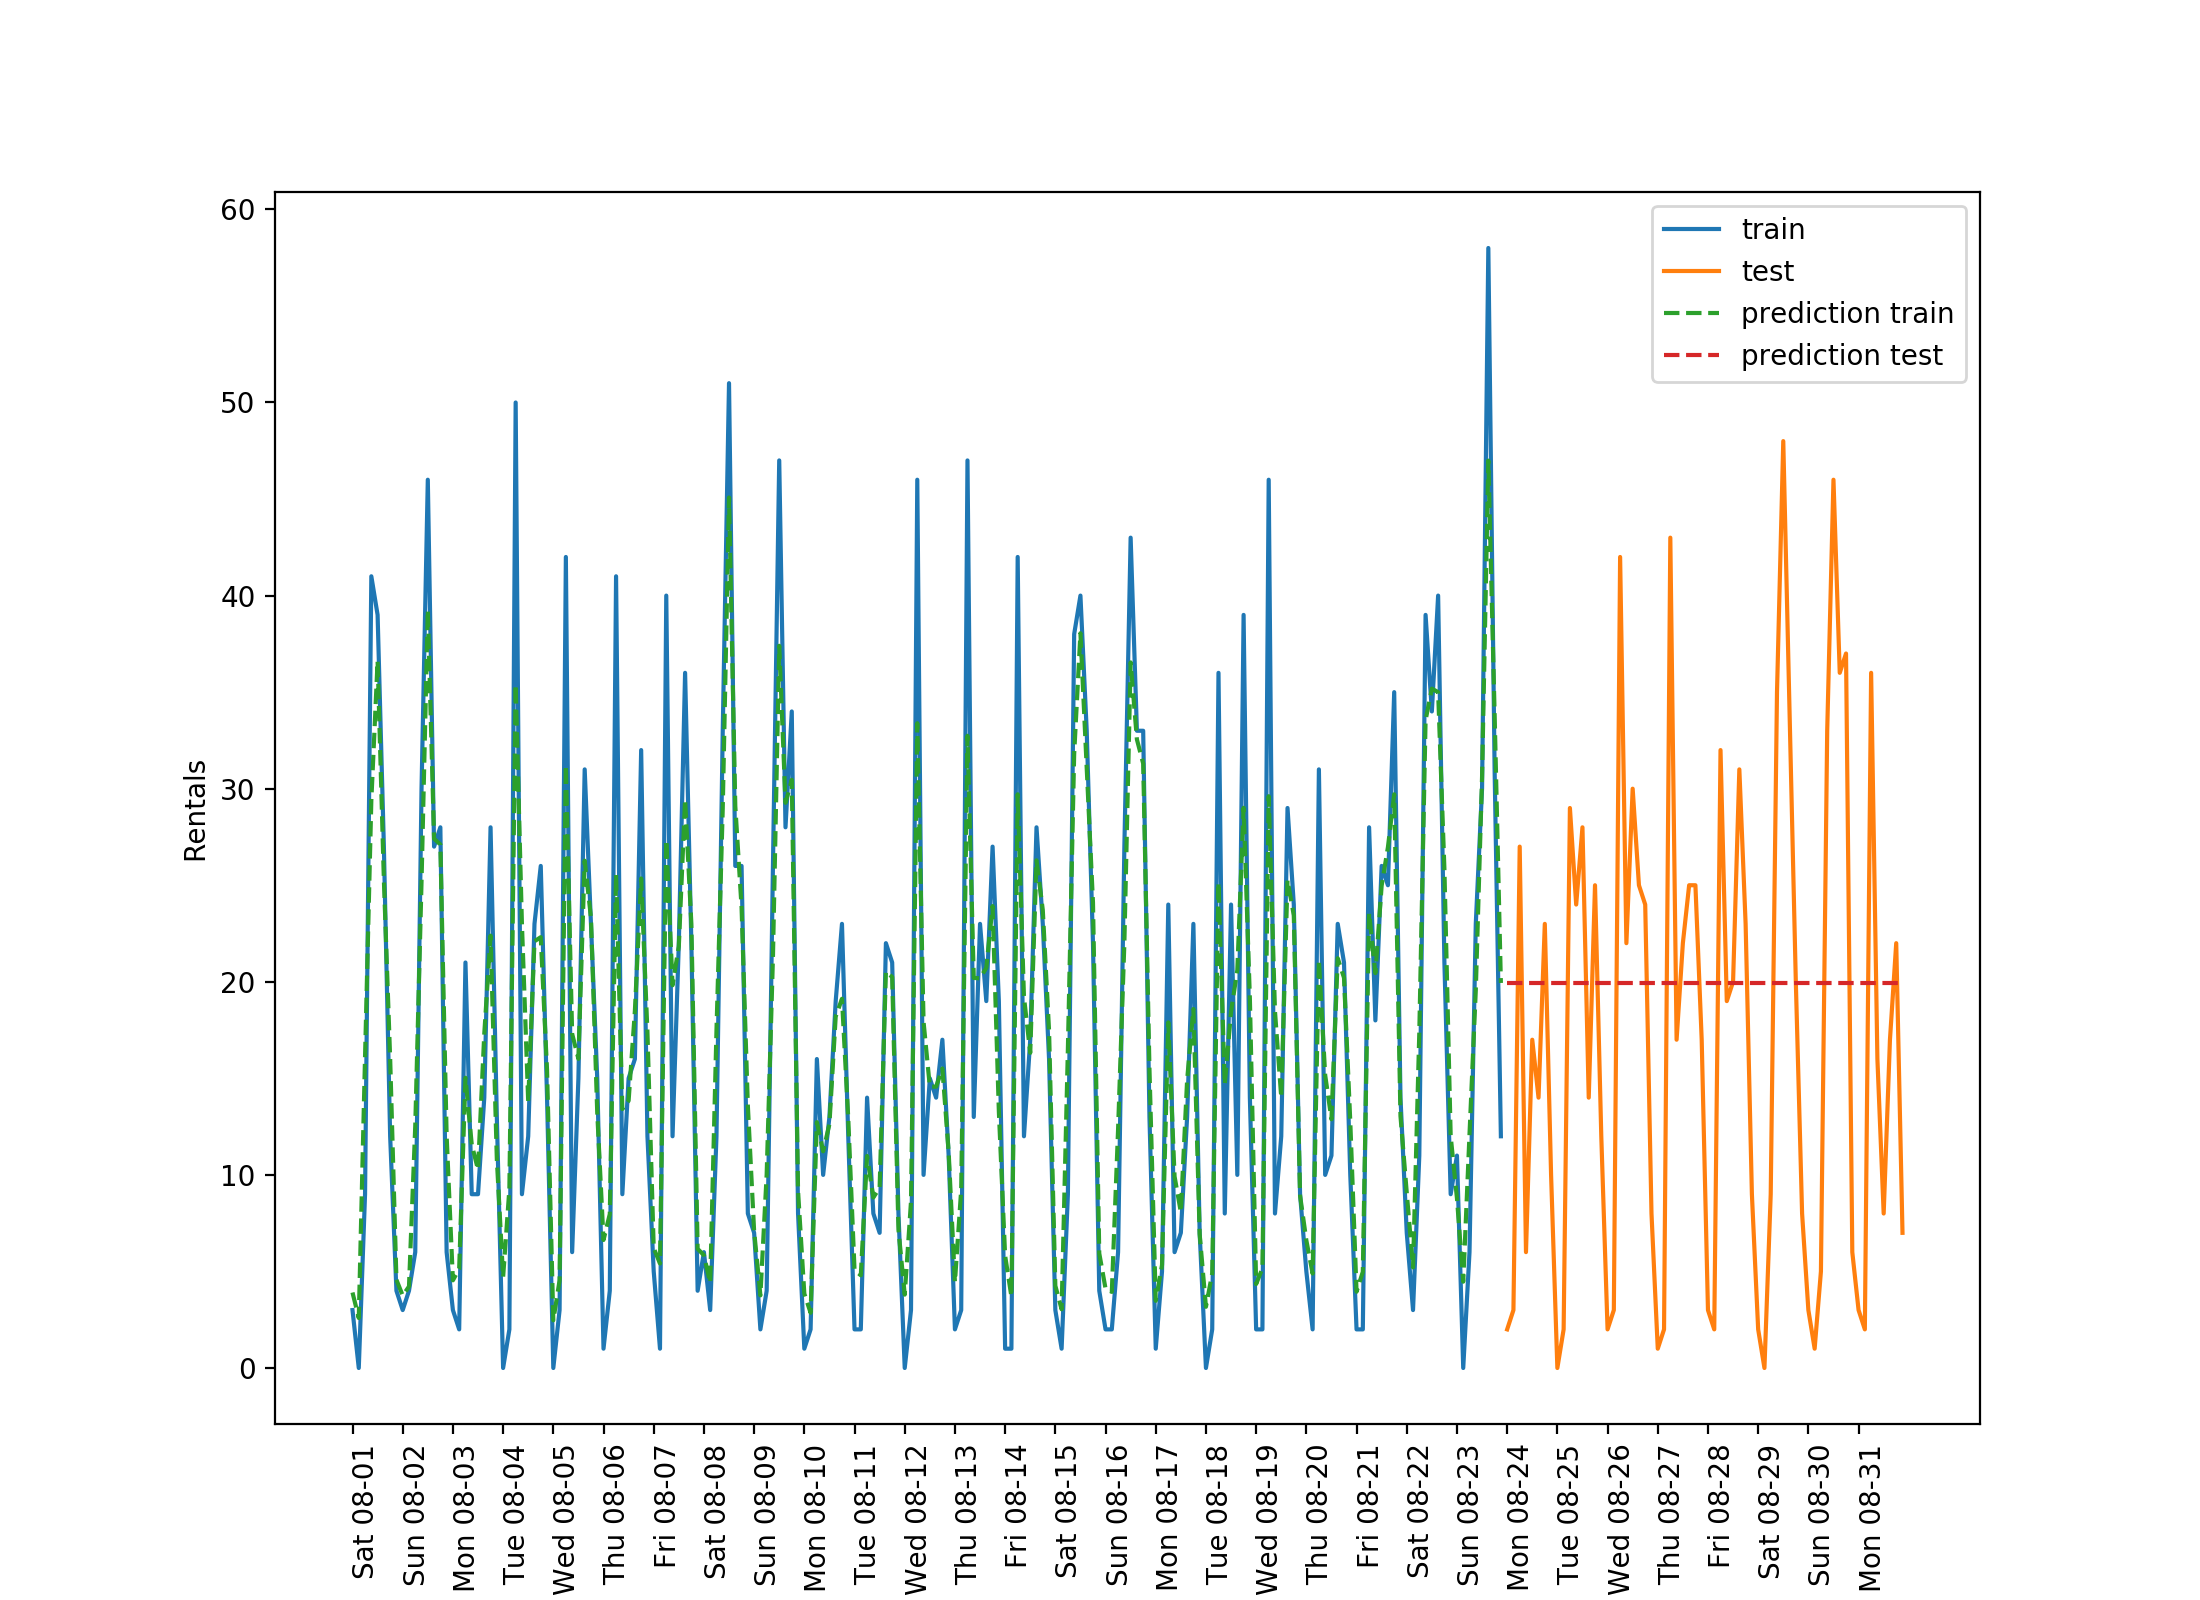

X_train shape: (184, 1), X_test.shape: (64, 1), y_train.shape: (184,), y_test.shape: (64,)
Test-set R^2: -0.04


In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y,  regressor)

In [11]:
X_hour = citibike.index.hour.values.reshape(-1, 1)

<IPython.core.display.Javascript object>


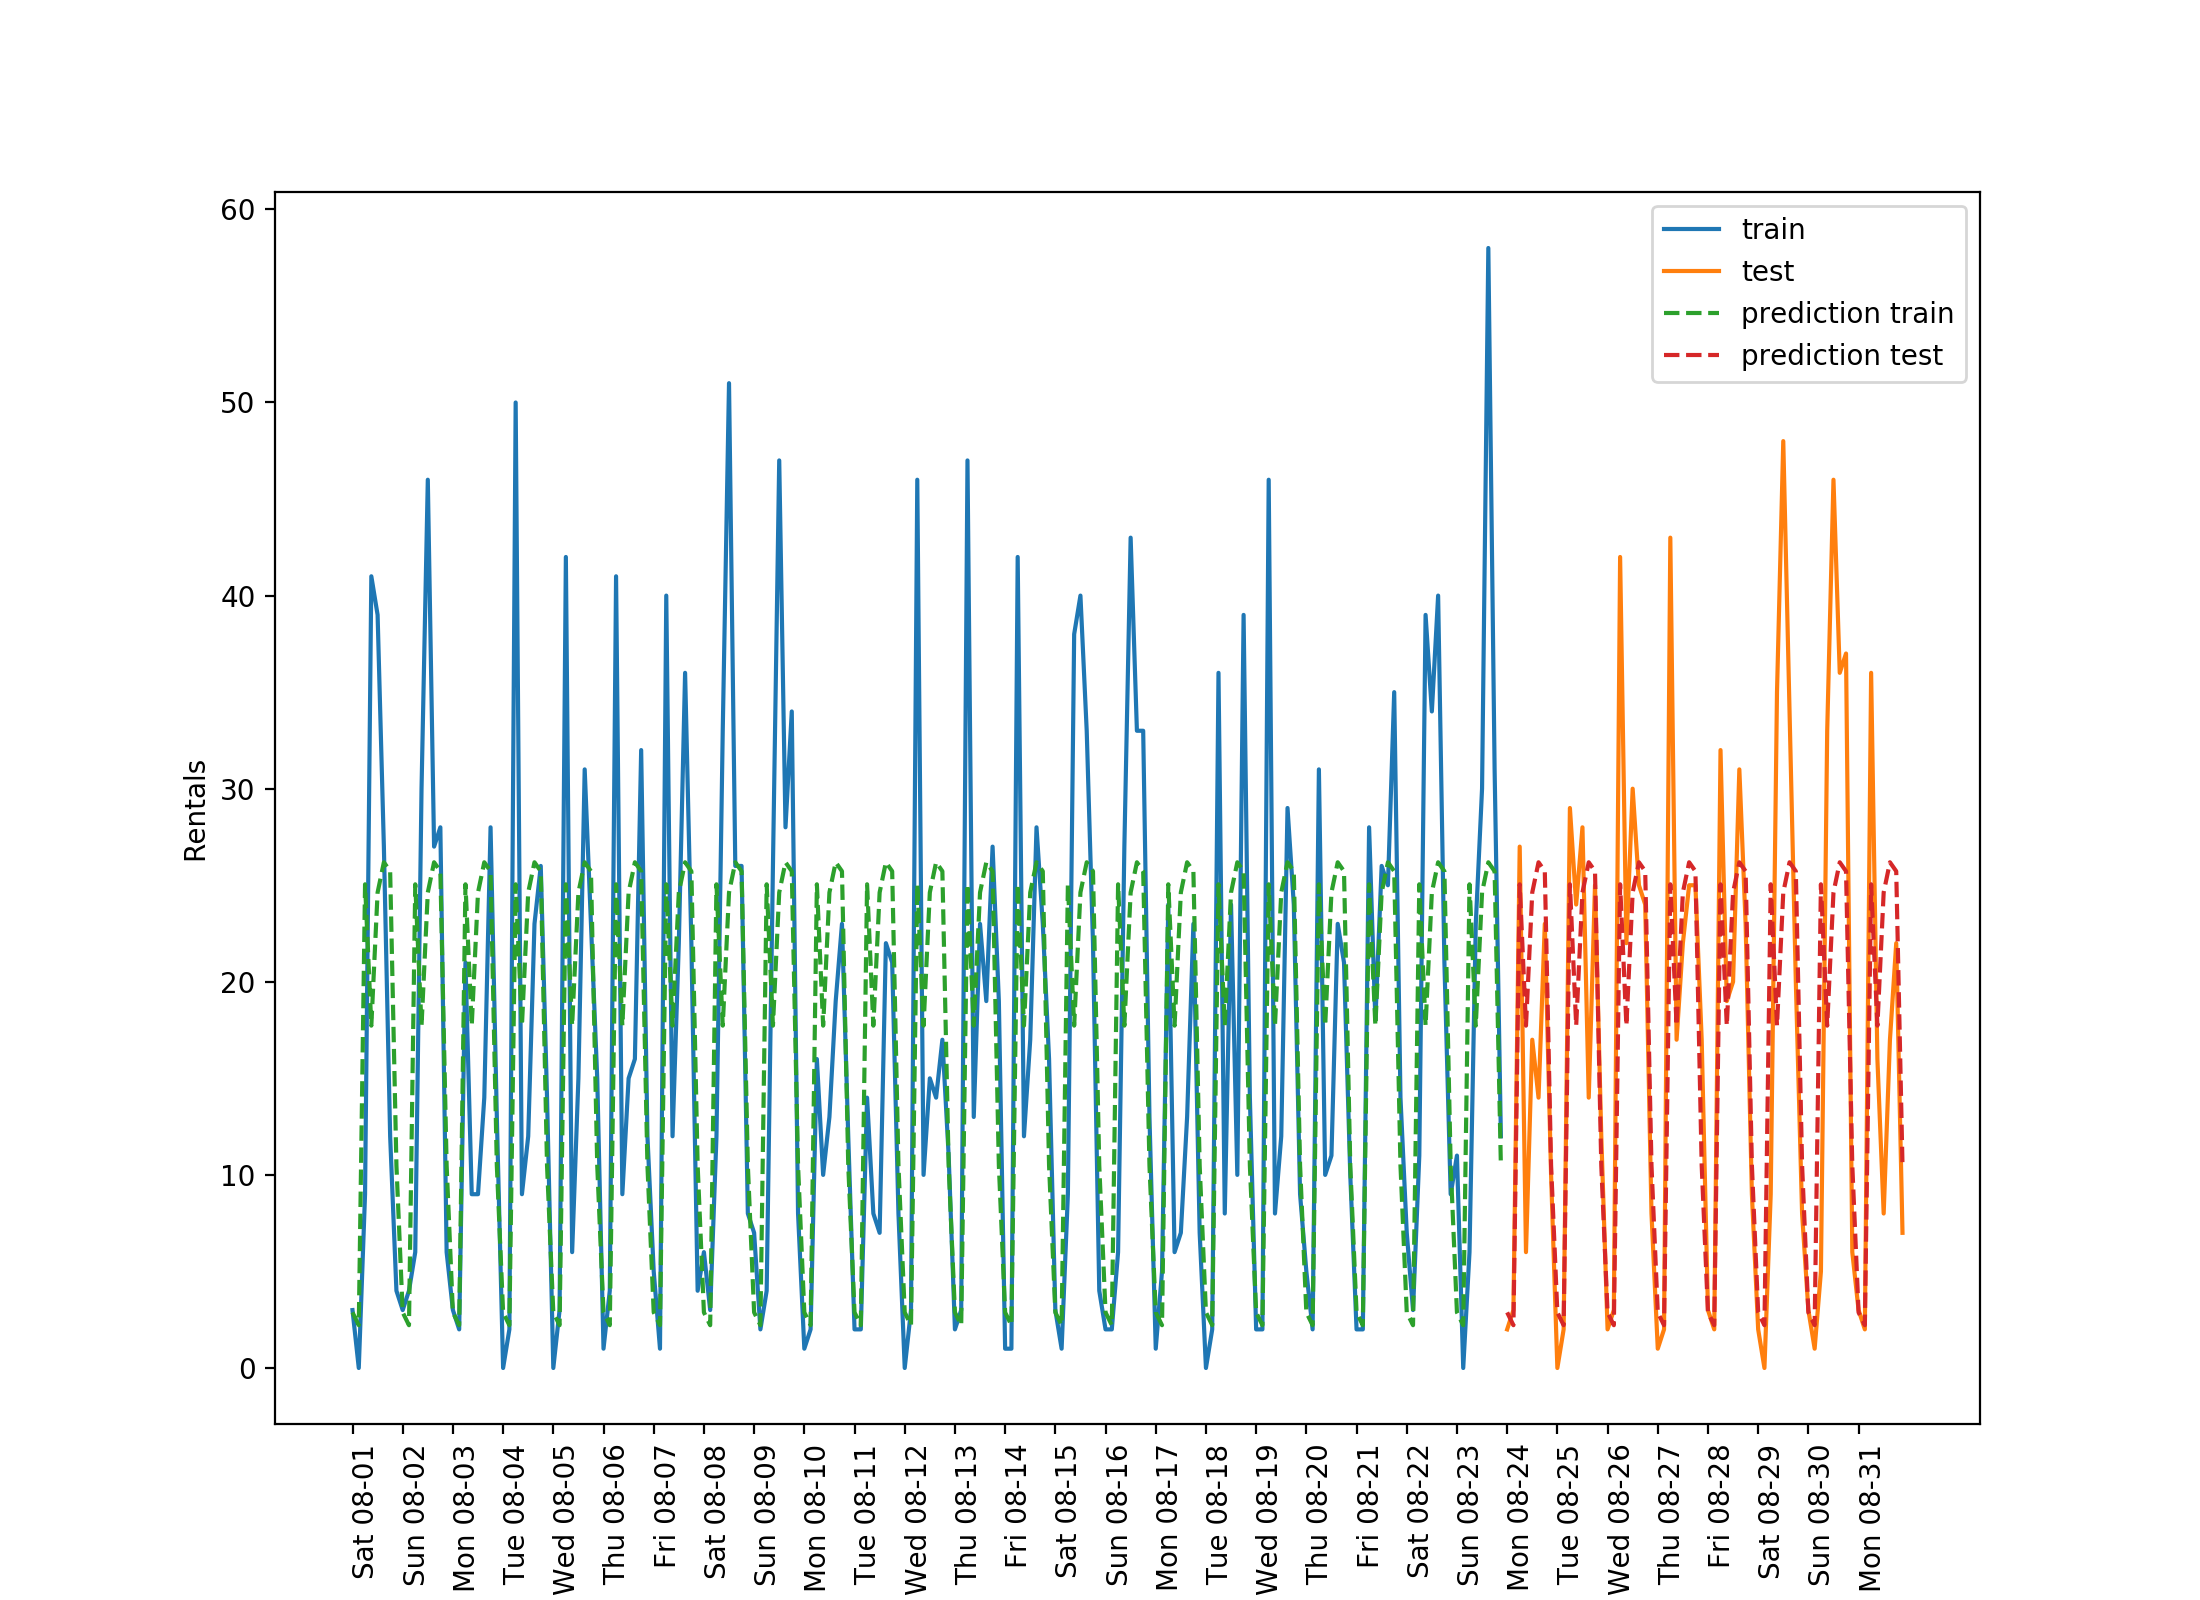

X_train shape: (184, 1), X_test.shape: (64, 1), y_train.shape: (184,), y_test.shape: (64,)
Test-set R^2: 0.60


In [12]:
eval_on_features(X_hour, y, regressor)

In [13]:
X_day_of_week = citibike.index.dayofweek.values.reshape(-1, 1) 

<IPython.core.display.Javascript object>


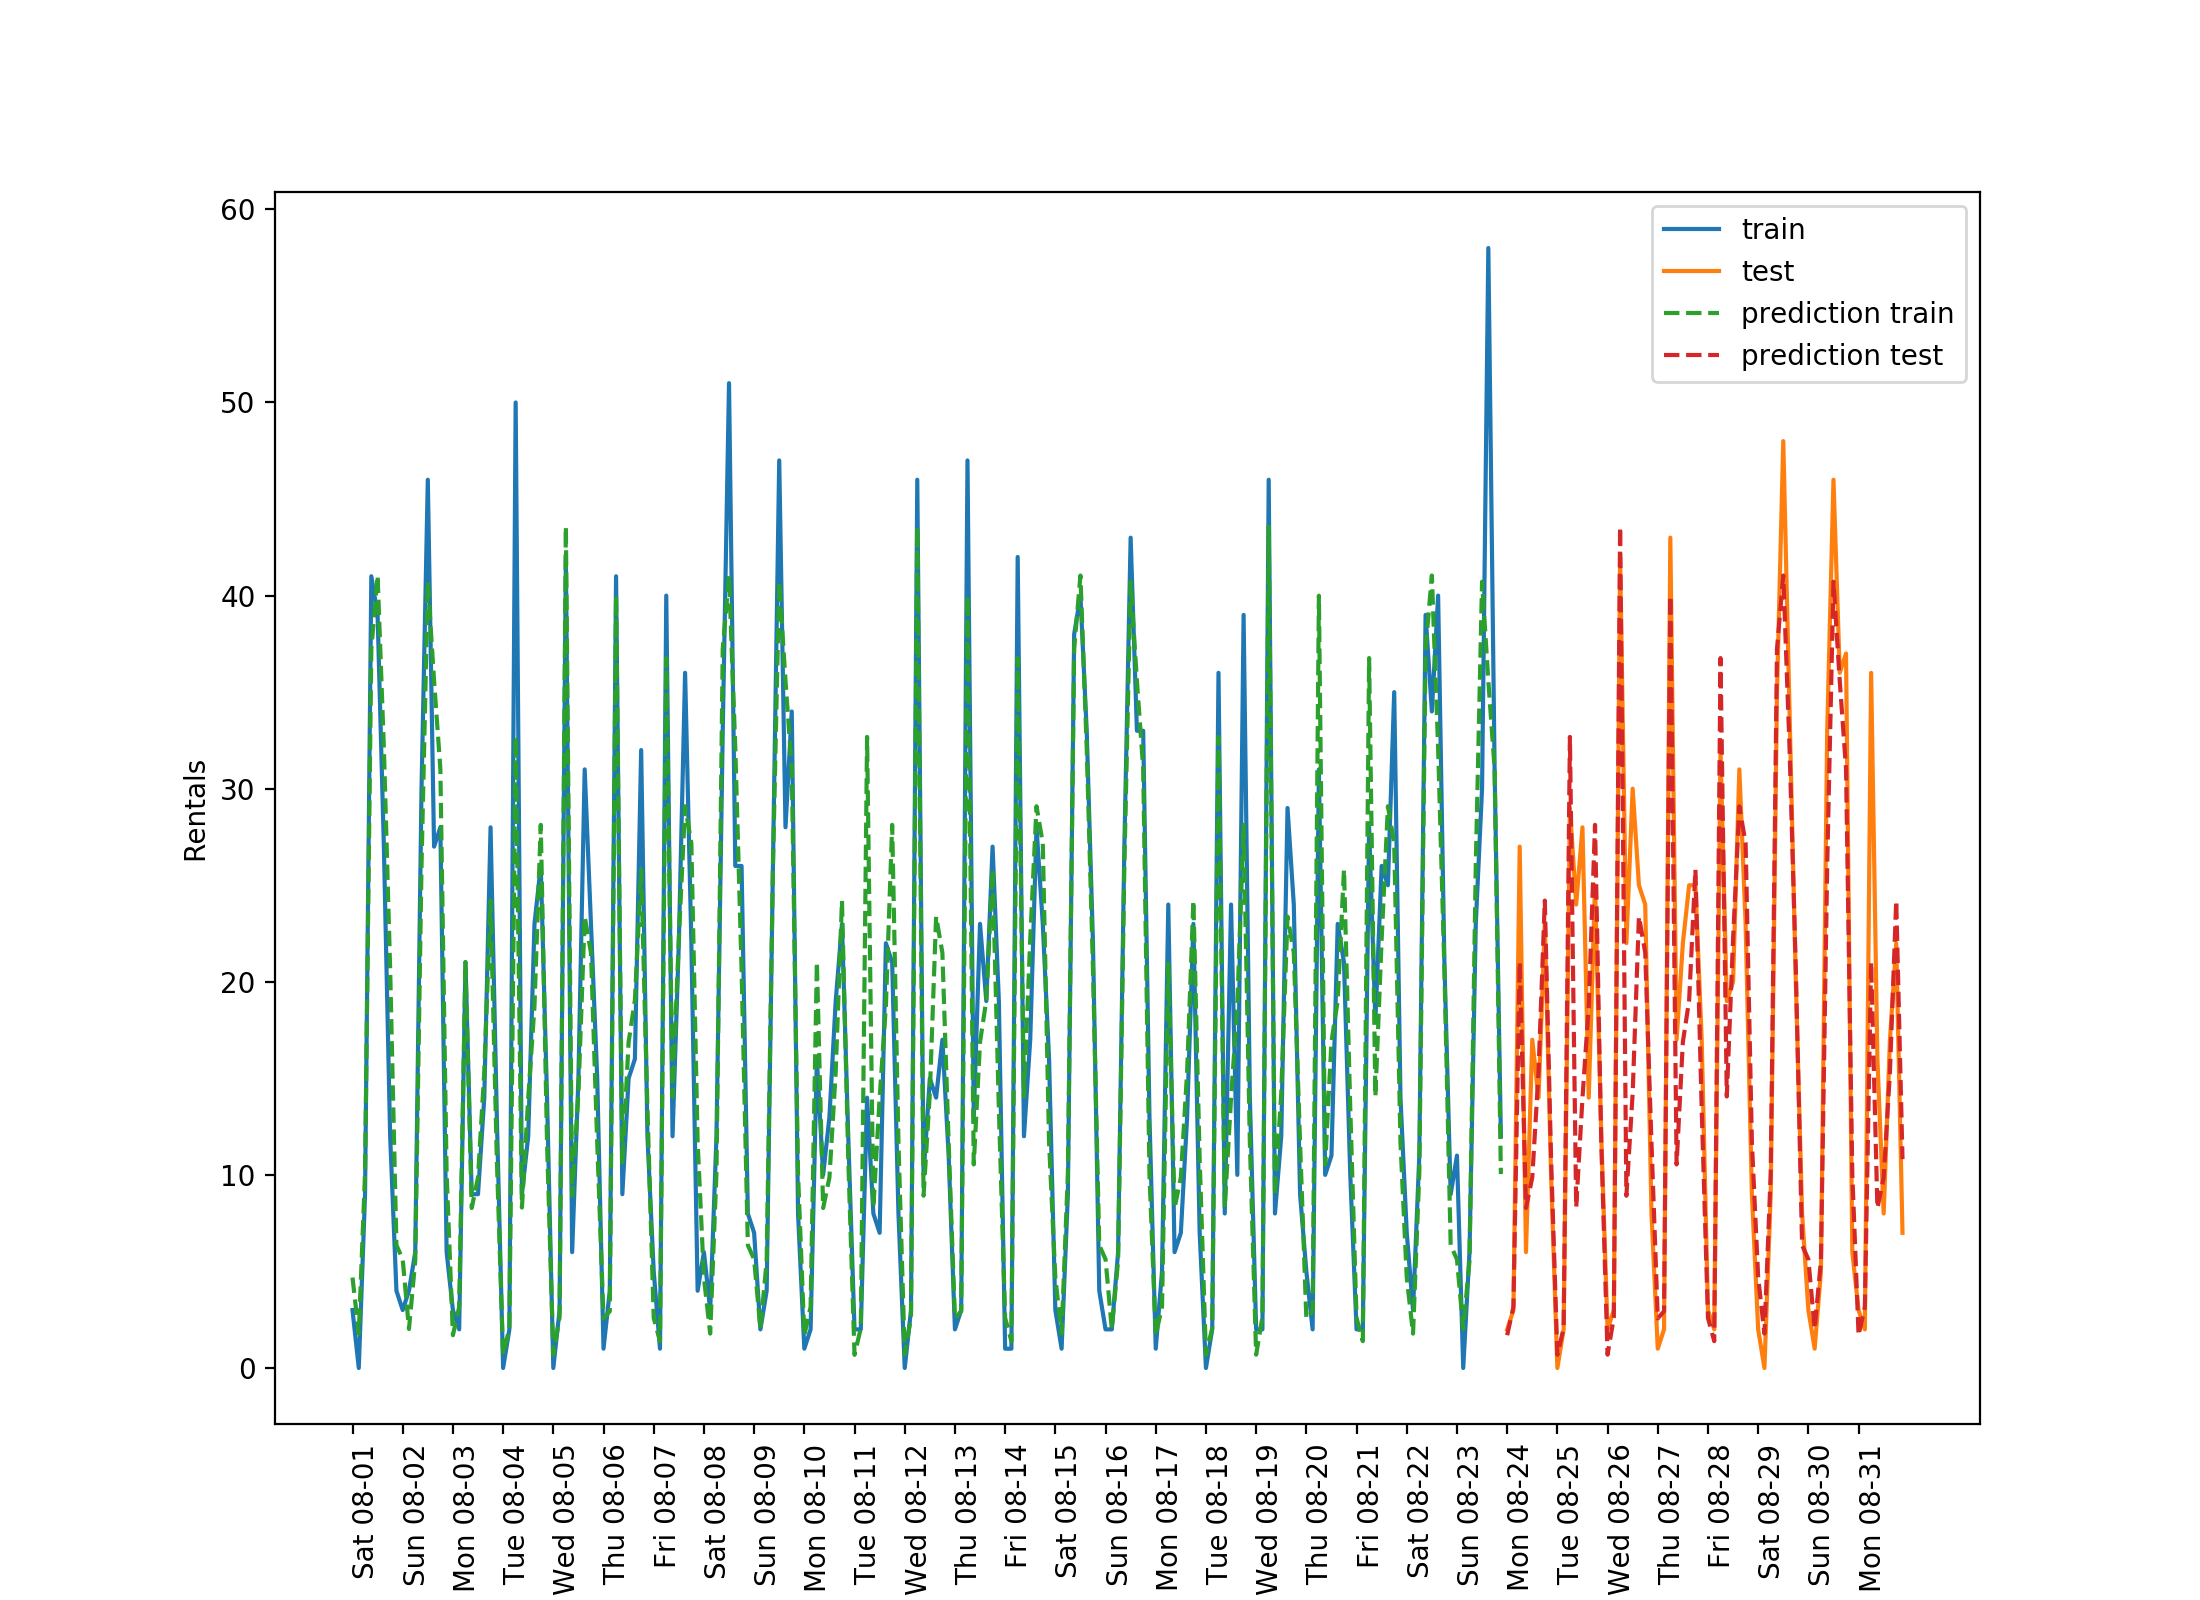

X_train shape: (184, 2), X_test.shape: (64, 2), y_train.shape: (184,), y_test.shape: (64,)
Test-set R^2: 0.84


In [14]:
X_hour_week = np.hstack([X_day_of_week, X_hour])
eval_on_features(X_hour_week, y, regressor)

<IPython.core.display.Javascript object>


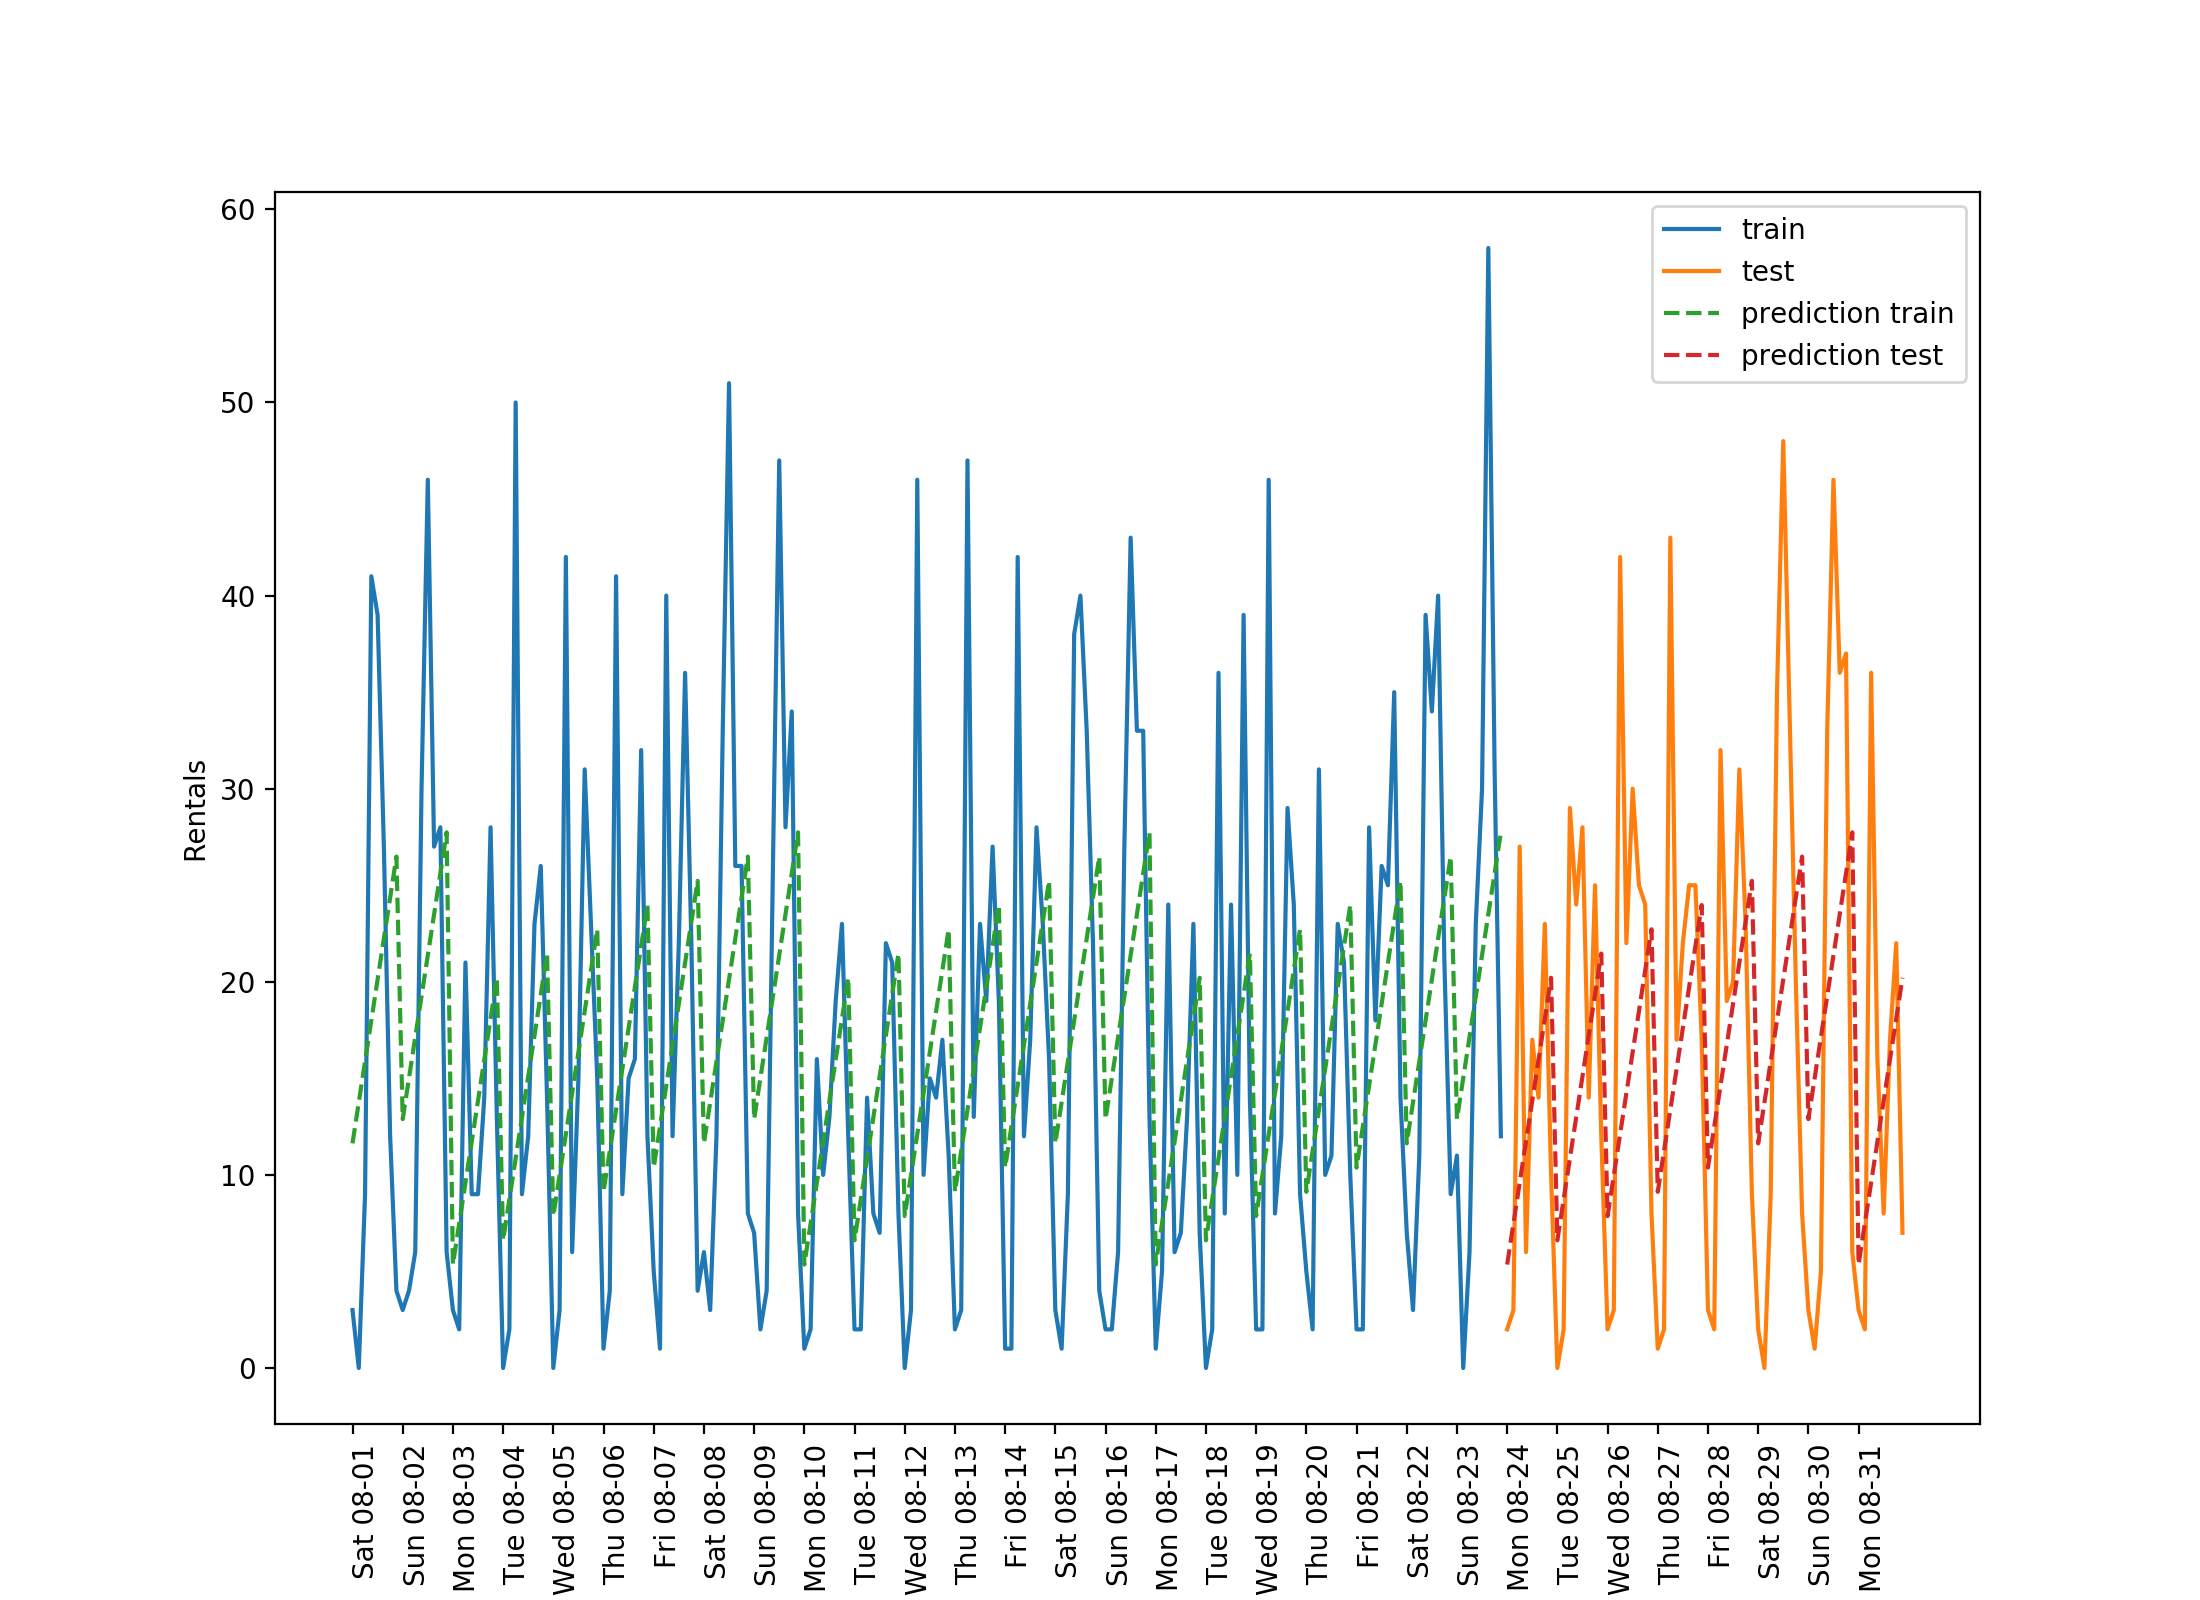

X_train shape: (184, 2), X_test.shape: (64, 2), y_train.shape: (184,), y_test.shape: (64,)
Test-set R^2: 0.13


In [15]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week)

In [17]:
type(X_hour_week_onehot)

scipy.sparse.csr.csr_matrix

In [18]:
X_hour_week_onehot = X_hour_week_onehot.toarray()

<IPython.core.display.Javascript object>


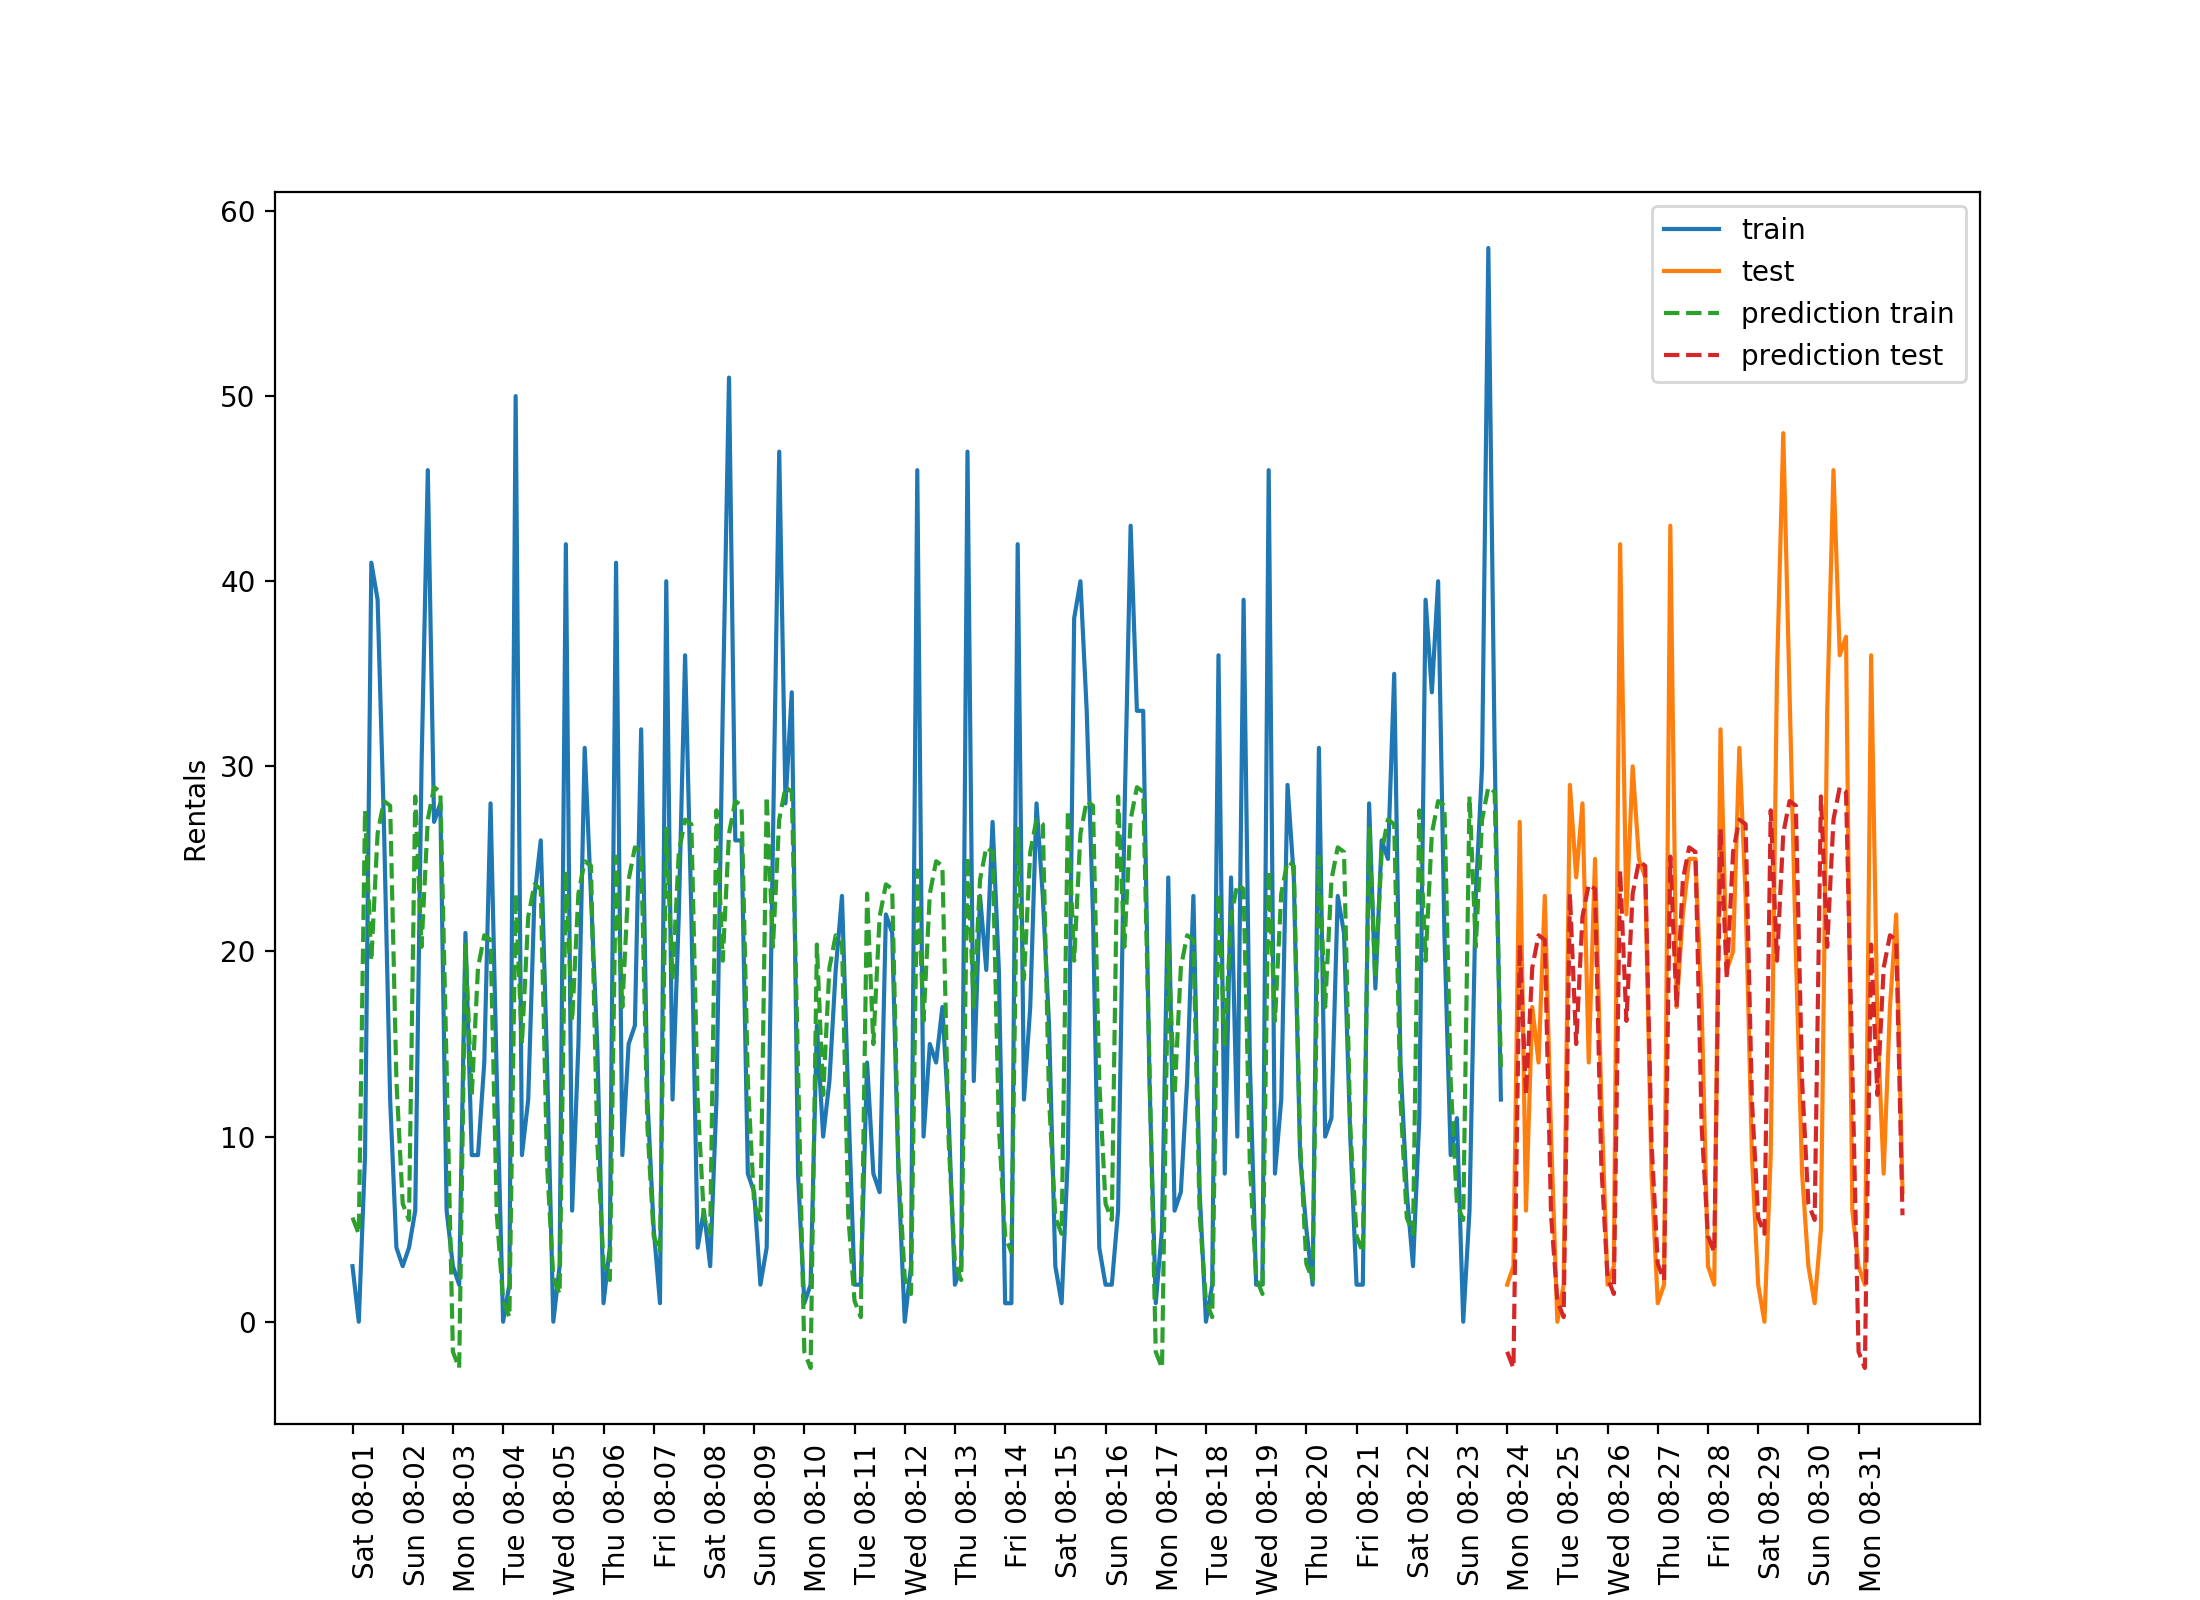

X_train shape: (184, 15), X_test.shape: (64, 15), y_train.shape: (184,), y_test.shape: (64,)
Test-set R^2: 0.62
hello world


In [19]:
eval_on_features(X_hour_week_onehot, y, LinearRegression())
print("hello world")

# this is a markdown cell

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)

<IPython.core.display.Javascript object>


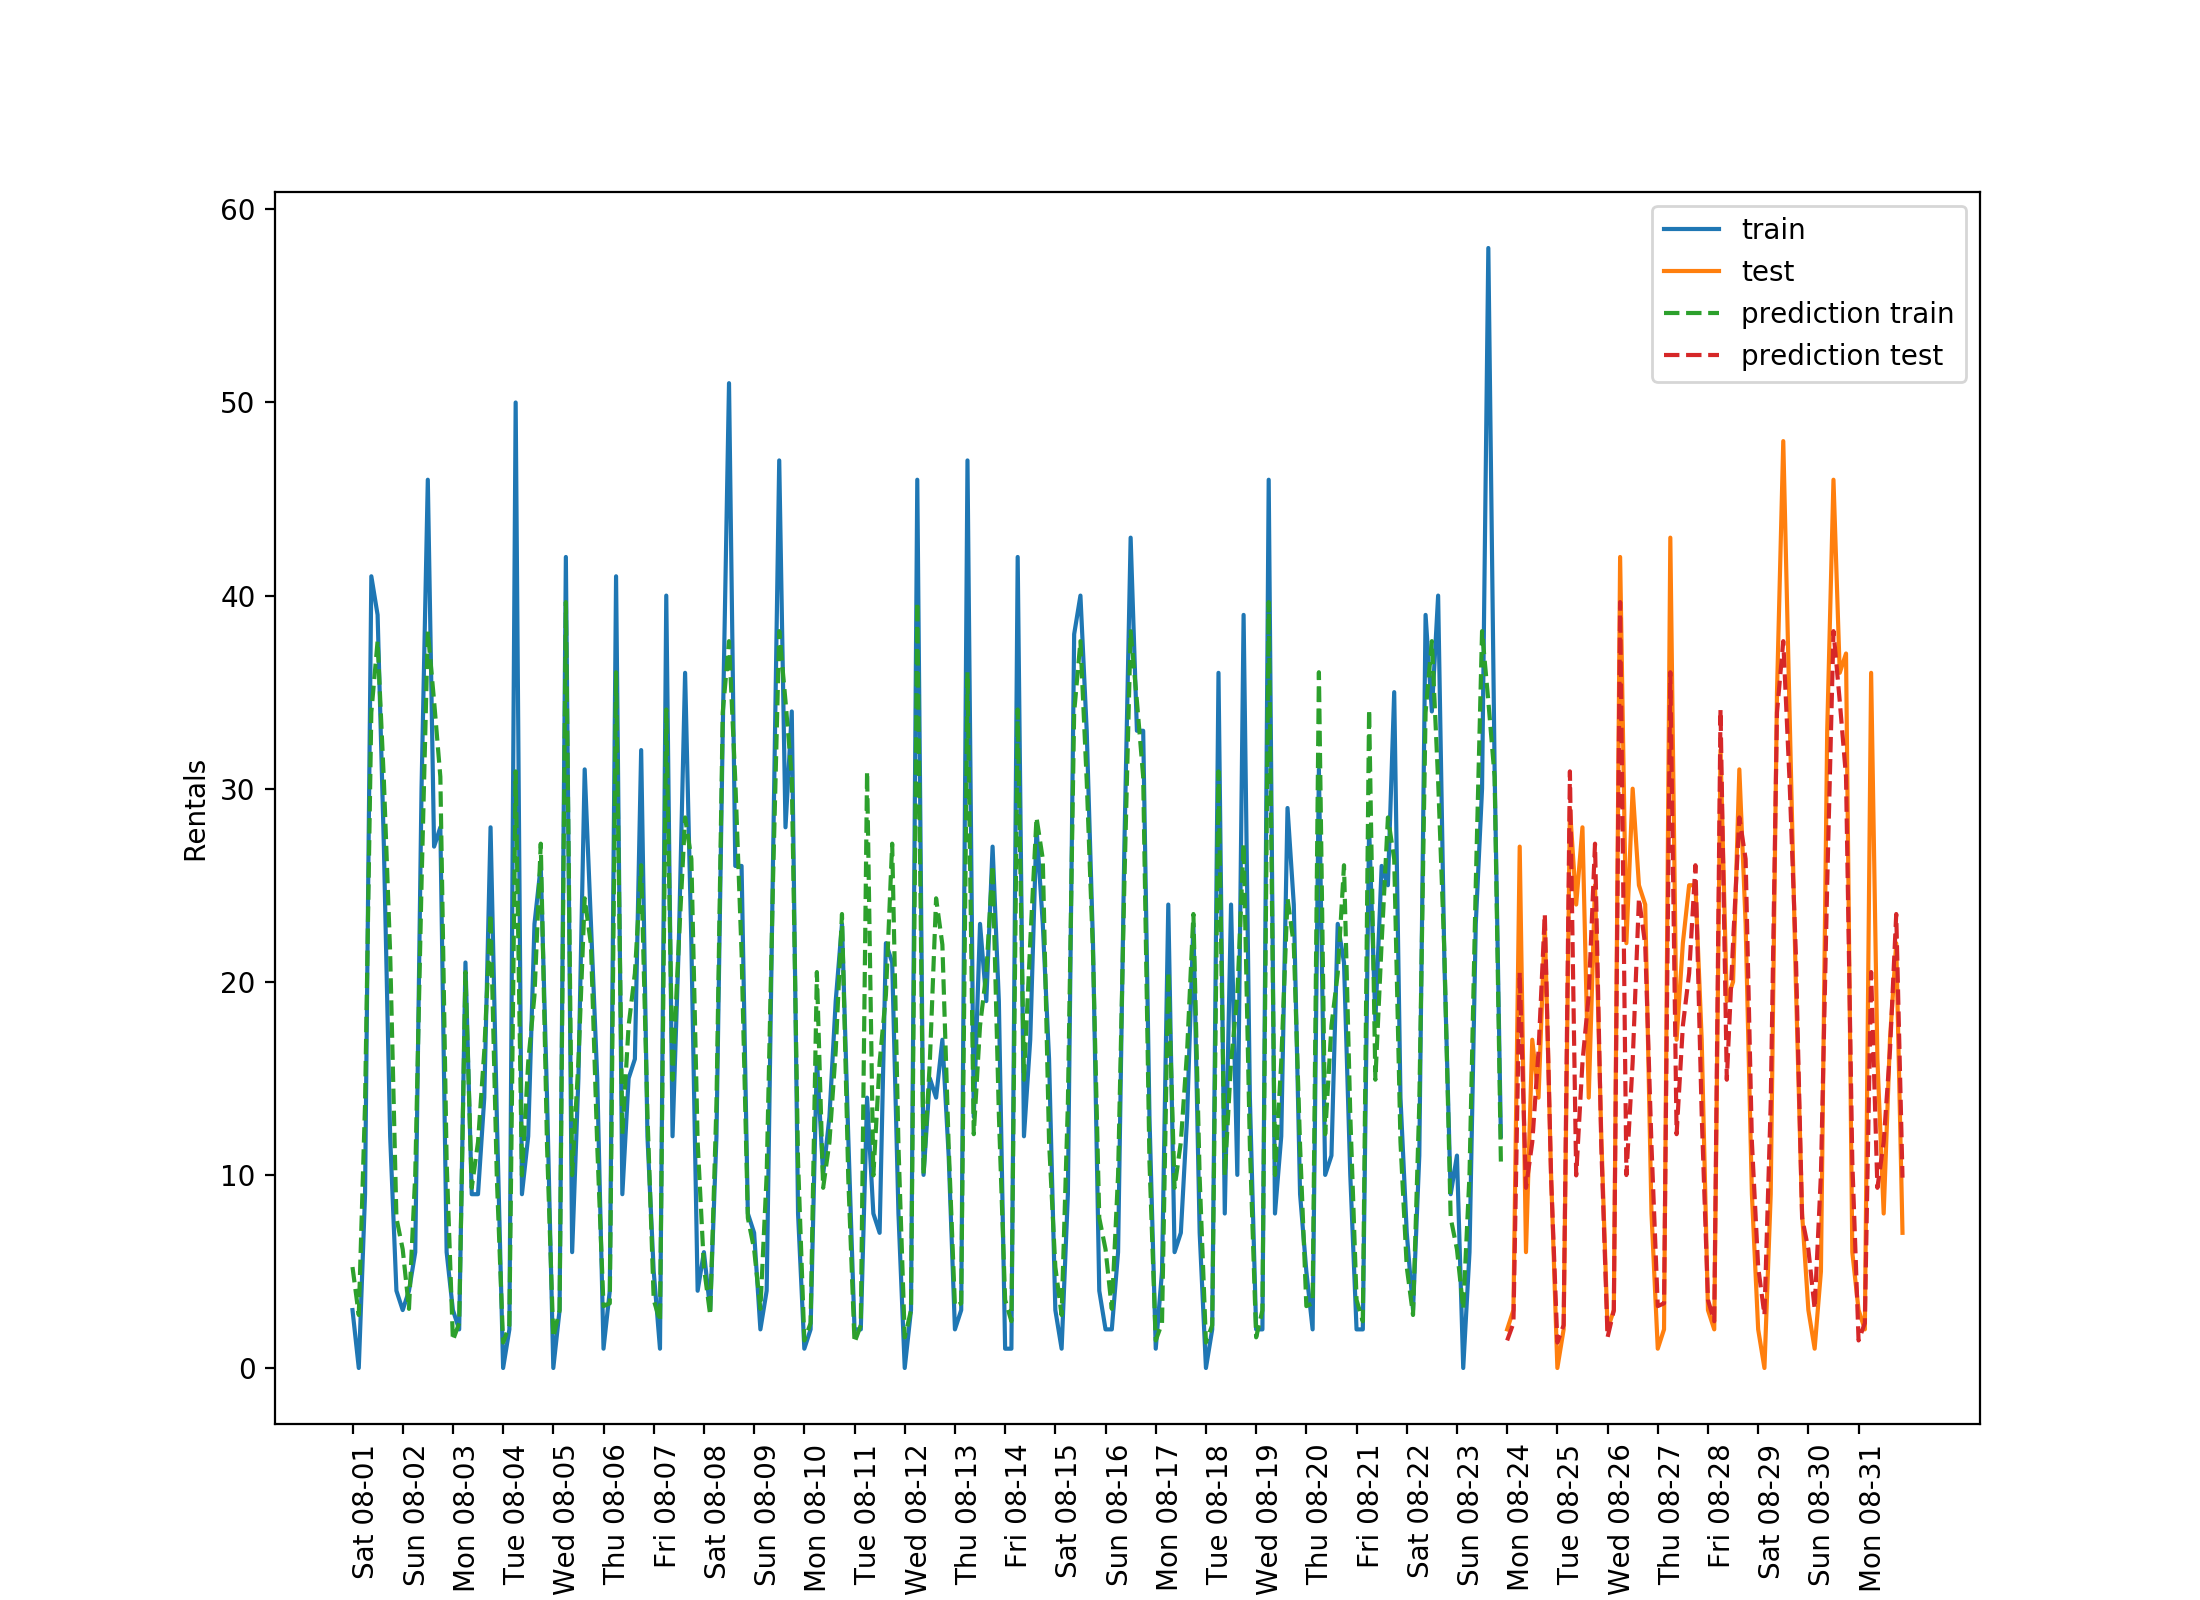

X_train shape: (184, 121), X_test.shape: (64, 121), y_train.shape: (184,), y_test.shape: (64,)
Test-set R^2: 0.85


In [22]:
from sklearn.linear_model import Ridge
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [45]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [46]:
feature_names = poly_transformer.get_feature_names(features)
features_nonzero = np.array(feature_names)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

<IPython.core.display.Javascript object>


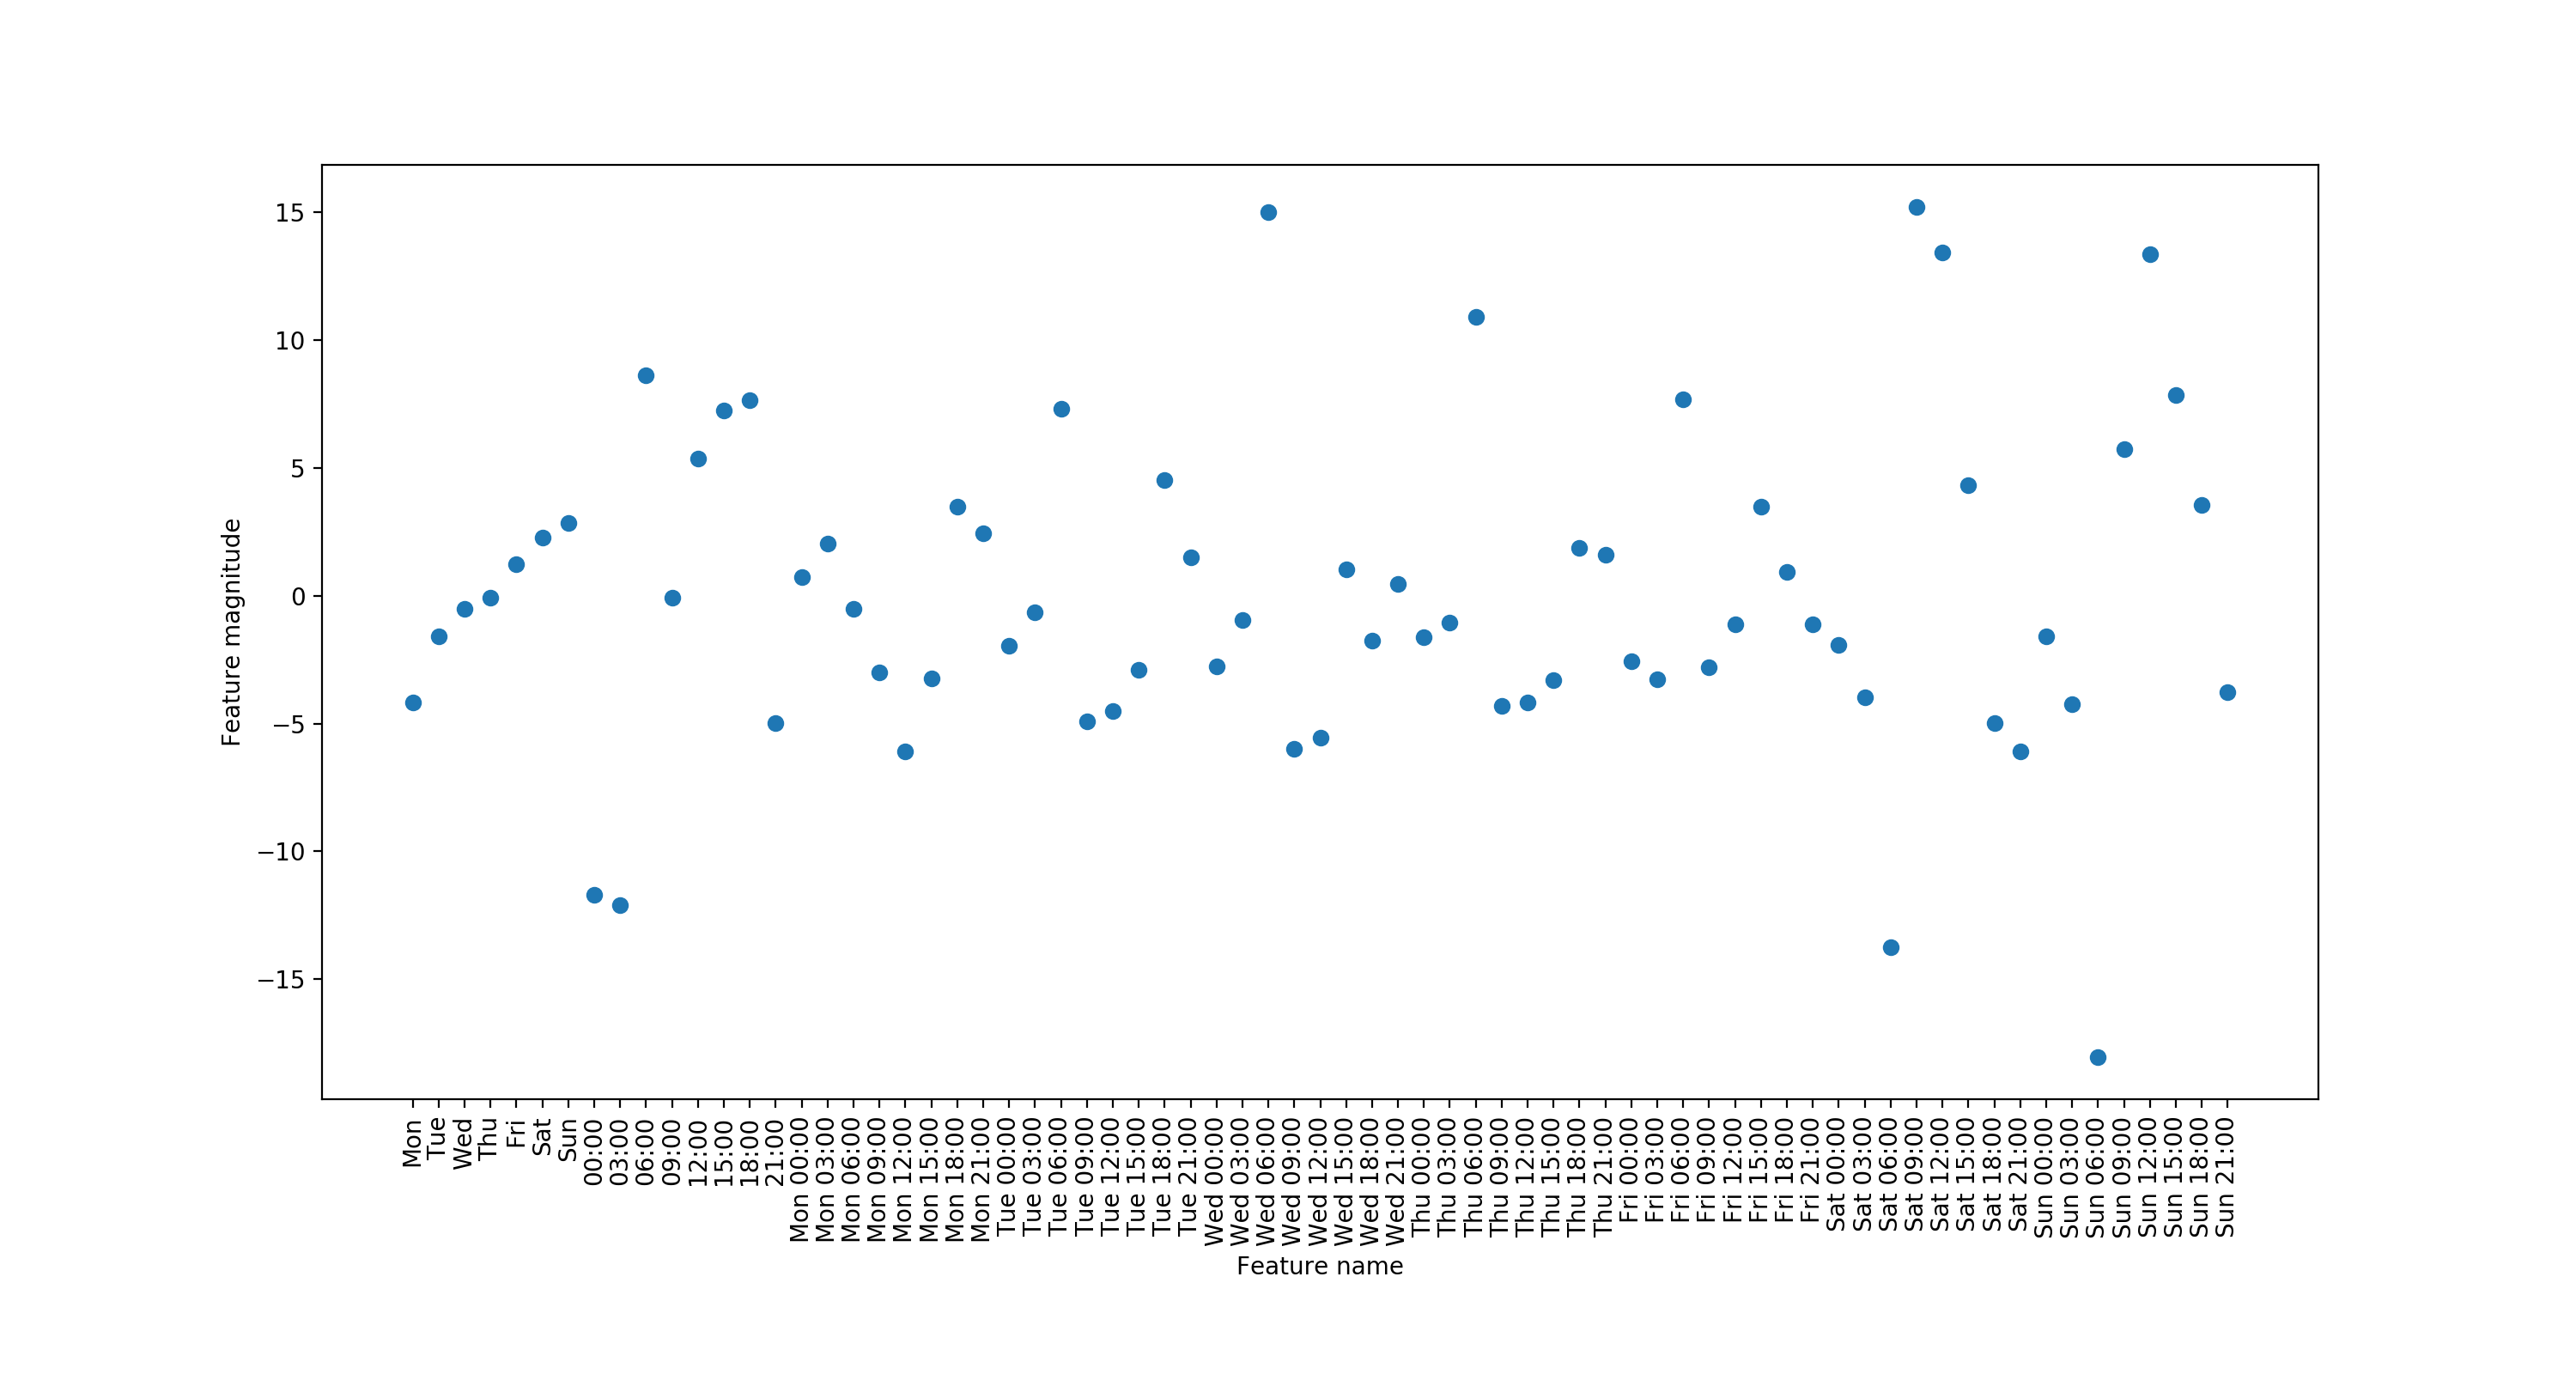

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(coef_nonzero, 'o')
ax.set_xticks(np.arange(len(coef_nonzero)))
ax.set_xticklabels(features_nonzero, rotation=90)
ax.set_xlabel("Feature name")
ax.set_ylabel("Feature magnitude")
fig.subplots_adjust(bottom=0.2)
              